In [129]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [260]:
import os                        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [261]:
# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#import eli5
#from eli5.sklearn import PermutationImportance

In [231]:
trainset_0717_final= pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data_final/trainset_0717_final.csv')

In [266]:
filtererd = trainset_0717_final[trainset_0717_final['is_test']==1]['도로명주소']

In [268]:
filtererd.drop_duplicates(inplace=True)

In [269]:
trainset_0717_final = pd.merge(trainset_0717_final,filtererd, on='도로명주소', how='inner')

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '계약년월일' 컬럼이 datetime 타입이 아니라면 변환
trainset_0717_final['계약년월일'] = pd.to_datetime(trainset_0717_final['계약년월일'])


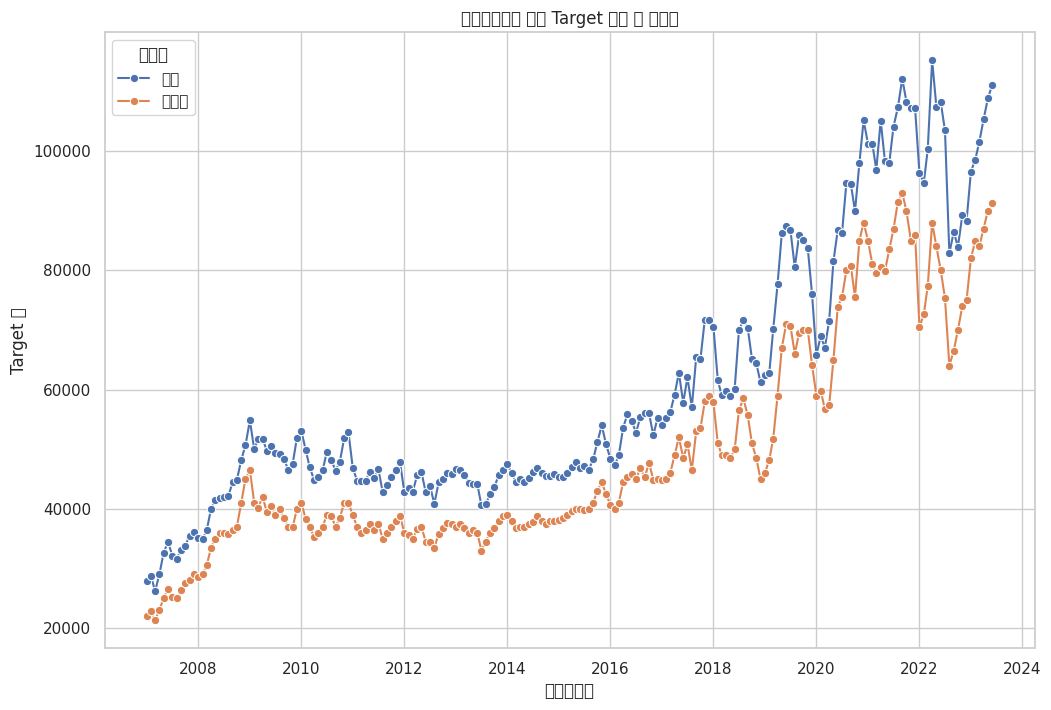

In [127]:
# 시각화 설정
sns.set(style="whitegrid")

# 데이터를 '계약년월일'로 그룹화하고, 'target'의 평균과 중앙값 계산
data_grouped = trainset_0717_final.groupby(trainset_0717_final['계약년월일'].dt.to_period("M"))['target'].agg(['mean', 'median']).reset_index()
data_grouped['계약년월일'] = data_grouped['계약년월일'].dt.to_timestamp()

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# lineplot으로 '계약년월일'에 따른 'target'의 평균 및 중앙값 시각화
sns.lineplot(data=data_grouped, x='계약년월일', y='mean', label='평균', marker='o')
sns.lineplot(data=data_grouped, x='계약년월일', y='median', label='중앙값', marker='o')

# 그래프 제목 및 축 라벨 설정
plt.title('계약년월일에 따른 Target 평균 및 중앙값')
plt.xlabel('계약년월일')
plt.ylabel('Target 값')

# 범례 표시
plt.legend(title='통계치')

# 그래프 표시
plt.show()


# 초품아

In [142]:
trainset_0717_final[['최단거리초등학교Km']].min()

최단거리초등학교Km    0.024101
dtype: float64

In [136]:
trainset_0717_final[['최단거리초등학교Km']].max()

최단거리초등학교Km    1.770578
dtype: float64

In [270]:
trainset_0717_final['초품아'] = trainset_0717_final['최단거리초등학교Km'].apply(lambda x: 1 if x <= 0.025 else 0)


# 시작

In [271]:
trainset_0717_final['로그_주택담보대출'] = np.log(trainset_0717_final['서울특별시_주택담보대출'] + 1)

In [272]:
trainset_0717_final['로그_가계대출'] = np.log(trainset_0717_final['서울특별시_가계대출'] + 1)

In [273]:
trainset_0717_final['로그_소비자물가지수'] = np.log(trainset_0717_final['소비자물가지수'] + 1)

In [274]:
trainset_0717_final['로그_전국매매가격지수'] = np.log(trainset_0717_final['전국매매가격지수'] + 1)

In [275]:
trainset_0717_final['로그_주택매매거래량'] = np.log(trainset_0717_final['서울특별시_주택매매거래량'] + 1)

In [276]:
trainset_0717_final['로그_부동산소비심리지수'] = np.log(trainset_0717_final['서울특별시_부동산소비심리지수'] + 1)

In [277]:
trainset_0717_final['로그_k-전체동수'] = np.log(trainset_0717_final['k-전체동수'] + 1)

In [278]:
trainset_0717_final['로그_k-전체세대수'] = np.log(trainset_0717_final['k-전체세대수'] + 1)

In [279]:
trainset_0717_final['로그_k-전체동수'] = np.log(trainset_0717_final['k-전체동수'] + 1)

In [76]:
trainset_0717_final.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '시군구', '번지', '본번', '부번', '아파트명',
       '전용면적(㎡)', '계약년월', '계약일',
       ...
       '5분이하_버스정류장_개수', '5분초과_10분이하_버스정류장_개수', '10분초과_15분이하_버스정류장_개수',
       '최단거리초등학교명', '최단거리초등학교Km', '로그_주택담보대출', '로그_가계대출', '로그_소비자물가지수',
       '로그_전국매매가격지수', '로그_주택매매거래량'],
      dtype='object', length=103)

In [294]:
selected_columns = [#'아파트명',
       '전용면적(㎡)','건축년도', 'target', 'is_test',#'층', '도로명', 
       '구', '동',
       #'k-단지분류(아파트,주상복합등등)', 
       'k-전체동수', 'k-전체세대수',
       '서울특별시_부동산소비심리지수',# '미분양_구', '국고채-회사채', 
       #'서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량',
       #'서울특별시_주택미분양', '미분양_서울특별시', 
       #'소형학원수', '중형학원수', 
       '대형학원수', '종합학원수', '입시학원수', '외국어학원수','모든학원수',
       'brand', 'upper_outliers', '강남여부', '가격높은동', '재건축예상',
       #'미분양_이동평균', '미분양_3개월대비', 
       '좌표X_2', '좌표Y_2', '5분이하_역_개수',
       '5분초과_10분이하_역_개수', '10분초과_15분이하_역_개수', '15분초과_20분이하_역_개수',
       '5분이하_버스정류장_개수', '5분초과_10분이하_버스정류장_개수', '10분초과_15분이하_버스정류장_개수',
       '초품아',
       '로그_주택담보대출','로그_가계대출','로그_소비자물가지수','로그_전국매매가격지수','로그_주택매매거래량',
       '로그_k-전체세대수','로그_k-전체동수','로그_부동산소비심리지수']

In [293]:
trainset_0717_for_model = trainset_0717_final[selected_columns]

In [283]:
train_for_model = trainset_0717_for_model[trainset_0717_for_model['is_test']==0]

In [284]:
test_for_model = trainset_0717_for_model[trainset_0717_for_model['is_test']==1]

In [285]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in train_for_model.columns:
    if pd.api.types.is_numeric_dtype(train_for_model[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적(㎡)', '건축년도', 'target', 'is_test', 'k-전체동수', 'k-전체세대수', '서울특별시_부동산소비심리지수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '모든학원수', 'brand', 'upper_outliers', '강남여부', '가격높은동', '재건축예상', '좌표X_2', '좌표Y_2', '5분이하_역_개수', '5분초과_10분이하_역_개수', '10분초과_15분이하_역_개수', '15분초과_20분이하_역_개수', '5분이하_버스정류장_개수', '5분초과_10분이하_버스정류장_개수', '10분초과_15분이하_버스정류장_개수', '초품아', '로그_주택담보대출', '로그_가계대출', '로그_소비자물가지수', '로그_전국매매가격지수', '로그_주택매매거래량', '로그_k-전체세대수', '로그_k-전체동수', '로그_부동산소비심리지수']
범주형 변수: ['구', '동']


In [286]:
continuous_columns = []
categorical_columns = []

for column in test_for_model.columns:
    if pd.api.types.is_numeric_dtype(test_for_model[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적(㎡)', '건축년도', 'target', 'is_test', 'k-전체동수', 'k-전체세대수', '서울특별시_부동산소비심리지수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '모든학원수', 'brand', 'upper_outliers', '강남여부', '가격높은동', '재건축예상', '좌표X_2', '좌표Y_2', '5분이하_역_개수', '5분초과_10분이하_역_개수', '10분초과_15분이하_역_개수', '15분초과_20분이하_역_개수', '5분이하_버스정류장_개수', '5분초과_10분이하_버스정류장_개수', '10분초과_15분이하_버스정류장_개수', '초품아', '로그_주택담보대출', '로그_가계대출', '로그_소비자물가지수', '로그_전국매매가격지수', '로그_주택매매거래량', '로그_k-전체세대수', '로그_k-전체동수', '로그_부동산소비심리지수']
범주형 변수: ['구', '동']


# 레이블 인코딩

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm(categorical_columns):
    lbl = LabelEncoder()

    # 모든 데이터를 문자열로 변환하여 Label-Encoding을 fit
    combined_data = np.unique(np.concatenate((train_for_model[col], test_for_model[col])).astype(str))
    lbl.fit(combined_data)
    
    train_for_model[col] = lbl.transform(train_for_model[col].astype(str))
    test_for_model[col] = lbl.transform(test_for_model[col].astype(str))
    
    label_encoders[col] = lbl  # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

# 결과 확인
print(train_for_model)
print(test_for_model)


# 원핫인코딩

In [254]:
# train_for_model과 test_for_model 데이터를 결합하여 원-핫 인코딩 수행
combined_data = pd.concat([train_for_model, test_for_model], axis=0)

# 원-핫 인코딩 수행
combined_data = pd.get_dummies(combined_data, columns=categorical_columns)

# 다시 train과 test 데이터로 분할
train_for_model = combined_data.iloc[:len(train_for_model), :]
test_for_model = combined_data.iloc[len(train_for_model):, :]

In [288]:
assert train_for_model.shape[1] == test_for_model.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

In [289]:
# Target과 독립변수들을 분리해줍니다.
y_train = train_for_model['target']
X_train = train_for_model.drop(['target'], axis=1)

# Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [290]:
# RandomForestRegressor를 이용해 회귀 모델을 적합시키겠습니다.
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [295]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 5804.270680944333


In [296]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 필요한 칼럼 선택
selected_columns = [#'아파트명',
       '전용면적(㎡)','건축년도', 'target', 'is_test',#'층', '도로명', 
       '구', '동',
       #'k-단지분류(아파트,주상복합등등)', 
       'k-전체동수', 'k-전체세대수',
       '서울특별시_부동산소비심리지수',# '미분양_구', '국고채-회사채', 
       #'서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량',
       #'서울특별시_주택미분양', '미분양_서울특별시', 
       #'소형학원수', '중형학원수', 
       '대형학원수', '종합학원수', '입시학원수', '외국어학원수','모든학원수',
       'brand', 'upper_outliers', '강남여부', '가격높은동', '재건축예상',
       #'미분양_이동평균', '미분양_3개월대비', 
       '좌표X_2', '좌표Y_2', '5분이하_역_개수',
       '5분초과_10분이하_역_개수', '10분초과_15분이하_역_개수', '15분초과_20분이하_역_개수',
       '5분이하_버스정류장_개수', '5분초과_10분이하_버스정류장_개수', '10분초과_15분이하_버스정류장_개수',
       '초품아',
       '로그_주택담보대출','로그_가계대출','로그_소비자물가지수','로그_전국매매가격지수','로그_주택매매거래량',
       '로그_k-전체세대수','로그_k-전체동수','로그_부동산소비심리지수'
]
analysis_data = trainset_0717_final[selected_columns]

# 상관관계 계산
correlation_matrix = analysis_data.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


ValueError: could not convert string to float: '도봉구'

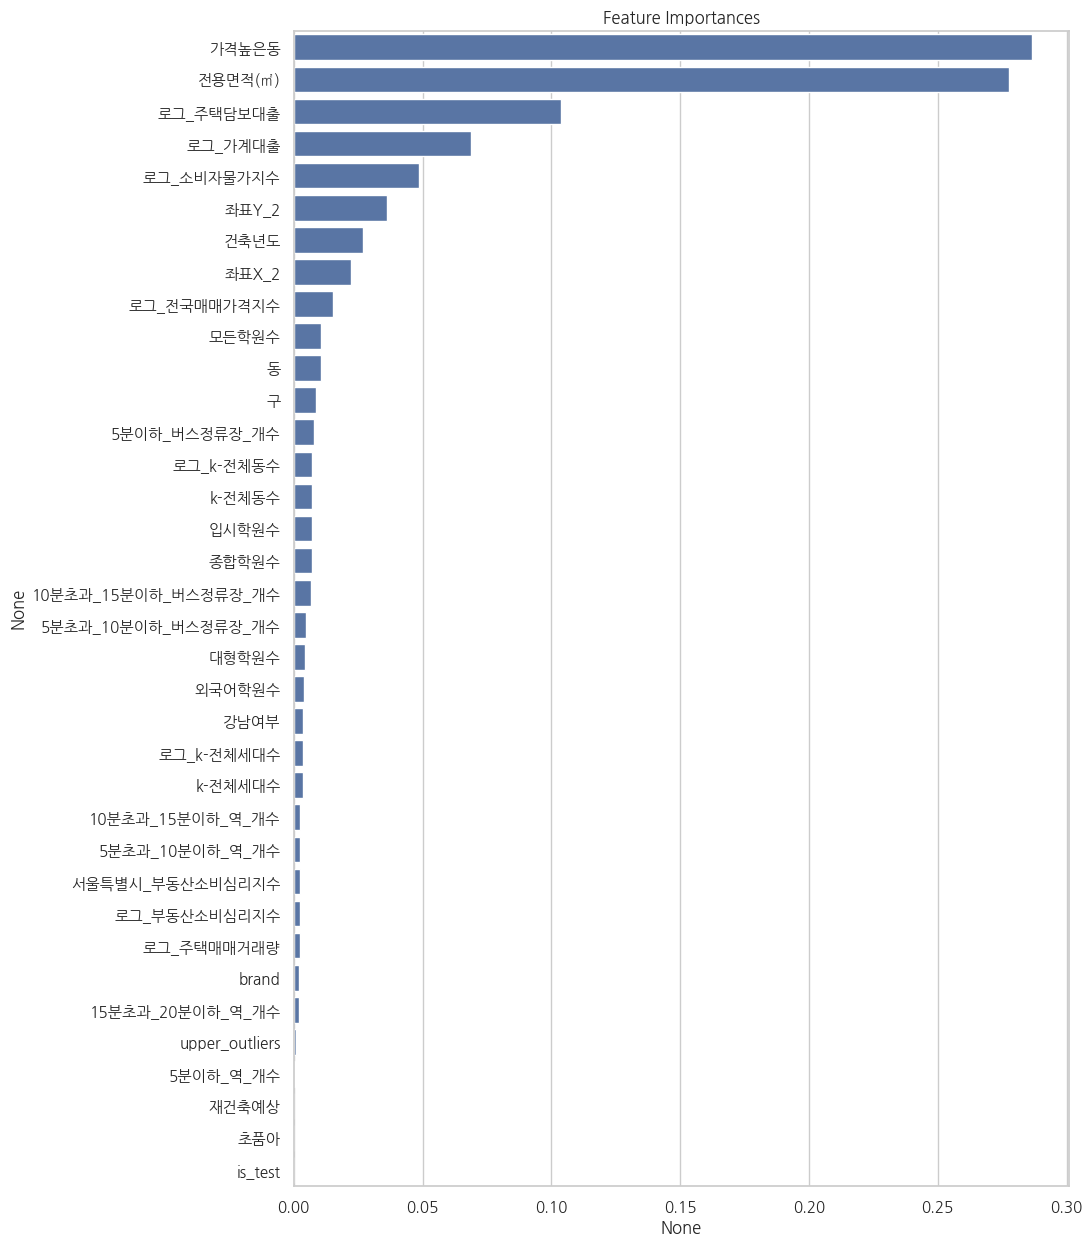

In [297]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,15))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [298]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('rf_0717.pkl', 'wb') as f:
    pickle.dump(model, f)

In [303]:
import eli5
from eli5.sklearn import PermutationImportance

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/data/ephemeral/home/yjl/upstage-ml-regression-ml5/new_venv/lib/python3.10/site-packages/sklearn/utils/metaestimators.py)

In [302]:
# Permutation importance 방법을 변수 선택에 이용해보겠습니다.
perm = PermutationImportance(model,        # 위에서 학습된 모델을 이용하겠습니다.
                             scoring = 'neg_mean_squared_error',        # 평가 지표로는 회귀문제이기에 negative rmse를 사용합니다. (neg_mean_squared_error : 음의 평균 제곱 오차)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid data에 대해 적합시킵니다.

NameError: name 'PermutationImportance' is not defined

In [ ]:
# Validation dataset에 target과 pred 값을 채워주도록 하겠습니다.
X_val['target'] = y_val
X_val['pred'] = pred

In [ ]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [ ]:
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [ ]:
X_val_sort.head()

In [ ]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [ ]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [ ]:
display(error_top100.head(1))
display(best_top100.head(1))

In [ ]:
# 저장된 모델을 불러옵니다.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [300]:
%%time
X_test = test_for_model.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)

CPU times: user 216 ms, sys: 4.02 ms, total: 220 ms
Wall time: 38.8 ms


In [301]:
# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('rf_0717.csv', index=False)